In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv('dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Feature Selection

<AxesSubplot:>

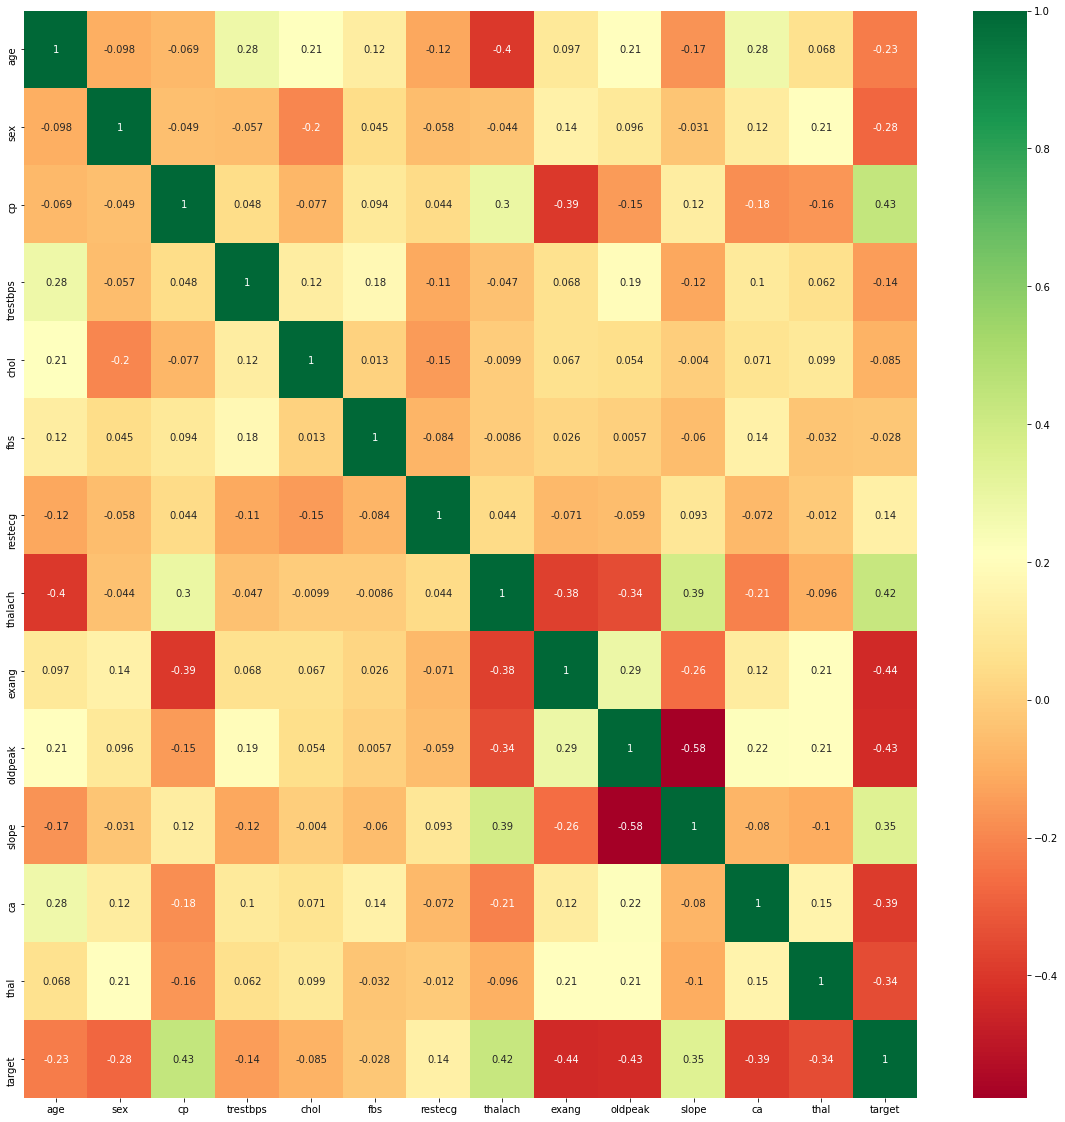

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

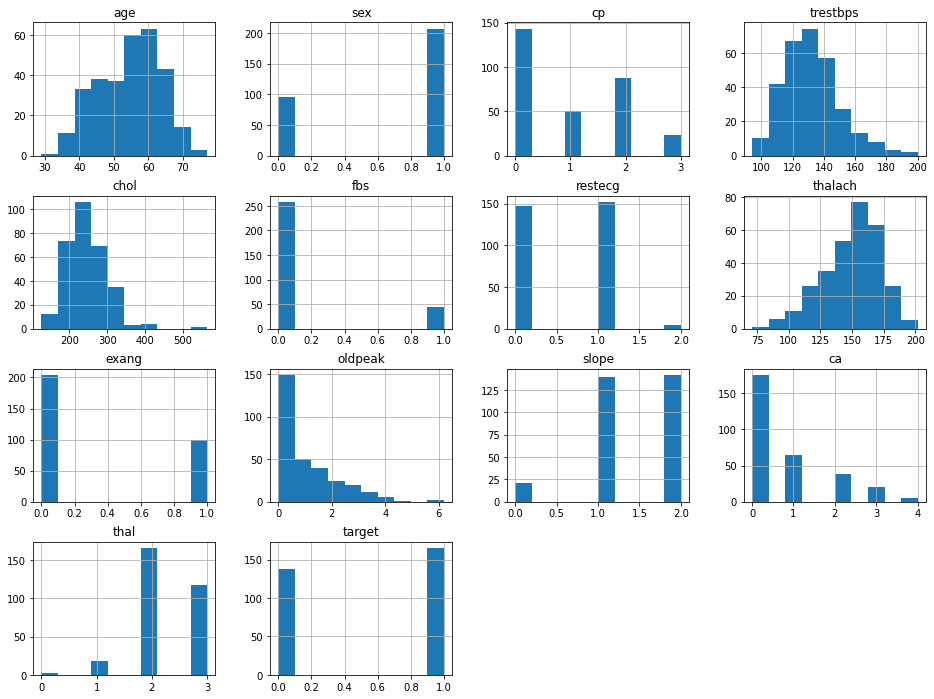

In [7]:
df.hist(figsize=(16,12))

<AxesSubplot:xlabel='target', ylabel='count'>

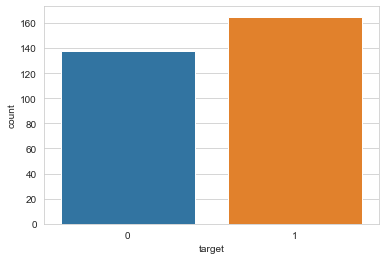

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
dataset=df.copy()

In [10]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [12]:
class evaluate_all_model:
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.naive_bayes import CategoricalNB
    from sklearn.cluster import KMeans
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.preprocessing import StandardScaler
    from xgboost import XGBClassifier
    import time
    def __init__(self,x,y):
        self.x=x
        self.y=y
        self.train_test_split()
        self.define_models()
        self.evaluate_model()
        print("best model base on Accuracy")
        print(self.best_model)
        
    def train_test_split(self):
        self.X_train, self.X_test, self.y_train,self.y_test =train_test_split(self.x, self.y,test_size=0.33, random_state=5)
        sc=self.StandardScaler()
        self.X_train = sc.fit_transform(self.X_train)
        self.X_test = sc.transform(self.X_test)
    def define_models(self):
        self.models={'LogisticRegression': self.LogisticRegression(),
    'RandomForestClassifier': self.RandomForestClassifier(),
     'KNeighborsClassifier': self.KNeighborsClassifier(),
    'DecisionTreeClassifier': self.DecisionTreeClassifier(),
    'SupportVectorMachine':self.SVC(),
    'GaussianNB': self.GaussianNB(),
    'BernoulliNB': self.BernoulliNB(),
    'GradientBoostingClassifier': self.GradientBoostingClassifier()
                    }
        
        self.modelNames =['LogisticRegression', 'RandomForestClassifier','KNeighborsClassifier','DecisionTreeClassifier','SupportVectorMachine',
                         'GaussianNB','BernoulliNB','GradientBoostingClassifier']
        self.trainScores = []
        self.testScores = []
        self.Time_taken=[]
        self.best_model_score=0
        self.best_model={}
        self.less_time=123
        
        
    def evaluate_model(self):
        for i in self.models:
            start = self.time.time()
            
            model=self.models[i]
            model.fit(self.X_train,self.y_train)
            train_score = model.score(self.X_train, self.y_train)
            self.trainScores.append(train_score)
            print(f'Model:- {i}')
            print(f'training score:- {train_score}')
            test_score = model.score(self.X_test, self.y_test)
            self.testScores.append(test_score)
            print(f'test Score:- {test_score}')
            
            y_predictions = model.predict(self.X_test)
            conf_matrix = confusion_matrix(y_predictions, self.y_test)
            print(f'Confussion Matrix: \n{conf_matrix}\n')
            
            tn = conf_matrix[0,0]
            fp = conf_matrix[0,1]
            tp = conf_matrix[1,1]
            fn = conf_matrix[1,0]
            accuracy  = (tp + tn) / (tp + fp + tn + fn)
            precision = tp / (tp + fp)
            recall    = tp / (tp + fn)
            f1score  = 2 * precision * recall / (precision + recall)
            specificity = tn / (tn + fp)
            print(f'Accuracy : {accuracy}')
            print(f'Precision: {precision}')
            print(f'Recall   : {recall}')
            print(f'F1 score : {f1score}')
            print(f'Specificity : {specificity}')

            end = self.time.time()
            time_taken=end-start
            self.Time_taken.append(time_taken)
            print(f'Time required {end-start}')
            print("***************************************************************************")
            print("____________________________________________________________________________")
            print("\n\n\n")
            if(float(test_score)>self.best_model_score):
                self.best_model["model Name"]=i
                self.best_model["Time Required on train and test"]=time_taken
                self.best_model["Accuracy on train data"]=train_score
                self.best_model["Accuracy on test data"]=accuracy
                self.best_model_score=test_score
                
            if(time_taken<self.less_time):
                self.less_time=time_taken
    def plot_bar(self):
        plt.bar(np.arange(len(self.trainScores)), self.trainScores, color='blue', width=0.25, edgecolor='white', label='train')
        plt.bar([x + 0.25 for x in np.arange(len(self.trainScores))], self.testScores, color='red', width=0.25, edgecolor='white', label='Test')
        plt.xlabel('Models', fontweight='bold', size = 24)
        plt.ylabel('Scores', fontweight='bold', size = 24)
        plt.xticks([r-0.25 for r in range(len(self.trainScores))], self.modelNames, rotation = 60)
        plt.legend()
        plt.show()
    def get_data(self):
        self.temp_dict={}
        self.temp_dict["Model"]=self.modelNames
        self.temp_dict["Training Score"]=self.trainScores
        self.temp_dict["Accuracy on Test"]=self.testScores
        self.temp_dict["Time Taken"]=self.Time_taken
        return self.temp_dict   
    def get_dataframe(self):
        return pd.DataFrame.from_dict(at.get_data()) 
            

In [13]:
at=evaluate_all_model(X,y)

Model:- LogisticRegression
training score:- 0.8029556650246306
test Score:- 0.9
Confussion Matrix: 
[[40  4]
 [ 6 50]]

Accuracy : 0.9
Precision: 0.9259259259259259
Recall   : 0.8928571428571429
F1 score : 0.9090909090909091
Specificity : 0.9090909090909091
Time required 0.3358793258666992
***************************************************************************
____________________________________________________________________________




Model:- RandomForestClassifier
training score:- 1.0
test Score:- 0.86
Confussion Matrix: 
[[40  8]
 [ 6 46]]

Accuracy : 0.86
Precision: 0.8518518518518519
Recall   : 0.8846153846153846
F1 score : 0.8679245283018868
Specificity : 0.8333333333333334
Time required 0.7937173843383789
***************************************************************************
____________________________________________________________________________




Model:- KNeighborsClassifier
training score:- 0.8571428571428571
test Score:- 0.88
Confussion Matrix: 
[[43  9]
 

In [14]:
at.get_dataframe()

,Model,Training Score,Accuracy on Test,Time Taken
0,LogisticRegression,0.802956,0.90,0.335879
1,RandomForestClassifier,1.000000,0.86,0.793717
2,KNeighborsClassifier,0.857143,0.88,0.108460
3,DecisionTreeClassifier,1.000000,0.68,0.019804
4,SupportVectorMachine,0.906404,0.86,0.143136
5,GaussianNB,0.817734,0.90,0.033700
6,BernoulliNB,0.827586,0.89,0.020637
7,GradientBoostingClassifier,1.000000,0.83,0.340773


In [15]:
from sklearn.linear_model import LogisticRegression
# X=standardScaler.fit_transform(X)

In [16]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
model=LogisticRegression(max_iter=2)
X_train, X_test, y_train,y_test =train_test_split(X, y,test_size=0.33, random_state=5)
X_train=standardScaler.fit_transform(X_train)
X_test=standardScaler.transform(X_test)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.91

In [17]:
import pickle

In [18]:
pickle.dump(model, open('Heart_desease_model', 'wb'))
pickle.dump(standardScaler, open('Heart_desease_standard_scaler', 'wb'))

In [19]:
loaded_model = pickle.load(open('Heart_desease_model', 'rb'))
sc = pickle.load(open('Heart_desease_standard_scaler', 'rb'))

In [20]:
loaded_model.score(X_test,y_test)

0.91